# Kaggle: Titanic

Kaggle의 입문 dataset인 [Titanic](https://www.kaggle.com/c/titanic)을 해보겠습니다. 파일은 사이트에서 직접 다운로드 받습니다.

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

import warnings
warnings.filterwarnings('ignore')

첨에는 불러서 테이블 대충 보구요.

In [72]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


아마도 이정도만 필요하지 않을까요?

In [73]:
df['Sex'] = np.where(df['Sex'] == 'male', 0, 1)
df = df[['Survived', 'Sex', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
df.head()

,Survived,Sex,Pclass,Age,SibSp,Parch,Fare
0,0,0,3,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,1,3,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,0,3,35.0,0,0,8.0500


추려낸 녀석들의 관계를 보구요.

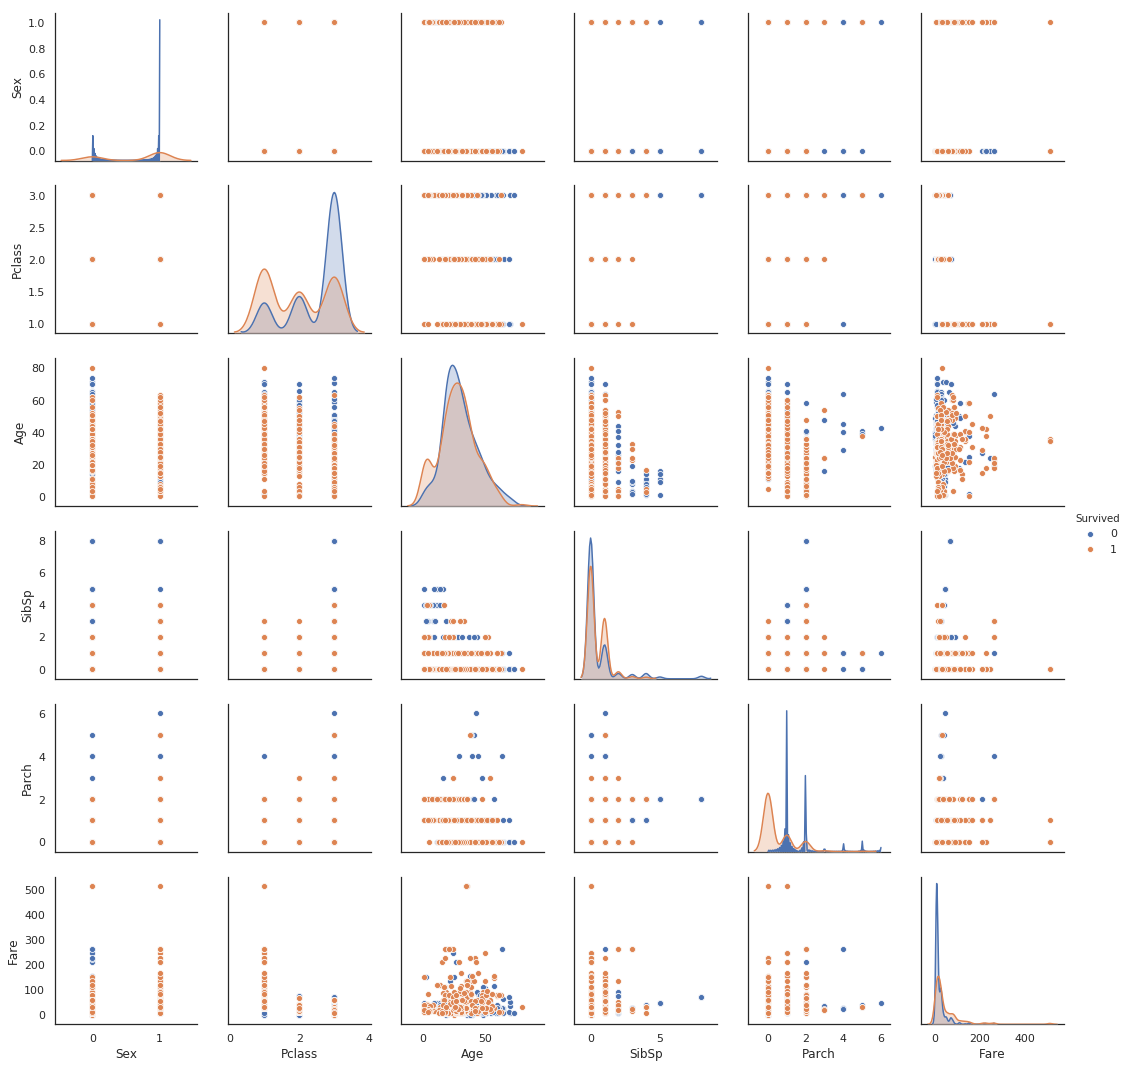

In [74]:
sns.pairplot(df, hue='Survived', vars=['Sex', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']);

첨에는 MinMaxScaler, PCA, SVC 로 다 돌려봅니다.

In [27]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(MinMaxScaler(), PCA(), SVC())
param_grid = {
    'pca__n_components': list(range(2, 7)),
    'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
}

df2 = df[['Survived', 'Sex', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].dropna()

grid = GridSearchCV(pipeline, param_grid, cv=5)
grid.fit(df2[['Sex', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']],
         df2['Survived'].values);

print(grid.best_params_)
print(grid.best_score_)

{'pca__n_components': 6, 'svc__C': 1, 'svc__gamma': 10}
0.8151260504201681


나쁘지 않네요. 이제는 LogisticRegression으로...

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(MinMaxScaler(), PCA(), LogisticRegression())
param_grid = {
    'pca__n_components': list(range(2, 7)),
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

df2 = df[['Survived', 'Sex', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].dropna()

grid = GridSearchCV(pipeline, param_grid, cv=5)
grid.fit(df2[['Sex', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']], #.fillna(df['Age'].mean()),
         df2['Survived'].values);

print(grid.best_params_)
print(grid.best_score_)

{'logisticregression__C': 100, 'pca__n_components': 4}
0.7969187675070029


SVC가 더 좋군요. Scaler를 바꿔볼까요?

In [31]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(StandardScaler(), PCA(), SVC())
param_grid = {
    'pca__n_components': list(range(2, 7)),
    'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
}

df2 = df[['Survived', 'Sex', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].dropna()

grid = GridSearchCV(pipeline, param_grid, cv=5)
grid.fit(df2[['Sex', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']],
         df2['Survived'].values);

print(grid.best_params_)
print(grid.best_score_)

{'pca__n_components': 6, 'svc__C': 100, 'svc__gamma': 0.01}
0.8291316526610645


더 좋군요. 이제 Age 의 NaN땜에 drop을 많이 했으니, 아예 Age 빼고 해볼까요?

In [38]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(StandardScaler(), PCA(), SVC())
param_grid = {
    'pca__n_components': list(range(2, 6)),
    'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
}

df2 = df[['Survived', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Fare']].dropna()

grid = GridSearchCV(pipeline, param_grid, cv=5)
grid.fit(df2[['Sex', 'Pclass', 'SibSp', 'Parch', 'Fare']],
         df2['Survived'].values);

print(grid.best_params_)
print(grid.best_score_)

{'pca__n_components': 3, 'svc__C': 1, 'svc__gamma': 0.1}
0.8080808080808081


아, Age를 빼도 값이 거의 비슷하네요. 차라리, Age를 Categorical 로 나눠볼까요? 우선, Age 분포를 보죠.

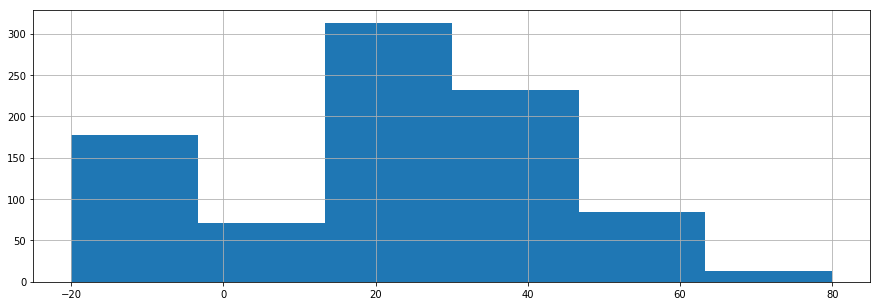

In [47]:
df['Age'].fillna(-20).hist(bins=6, figsize=(15, 5));

In [51]:
df['Age_missing'] = np.where(df['Age'].isnull(), 1, 0)
df['Age_1'] = np.where(df['Age'] <= 10, 1, 0)
df['Age_2'] = np.where((df['Age'] > 10) & (df['Age'] <= 20), 1, 0)
df['Age_3'] = np.where((df['Age'] > 20) & (df['Age'] <= 30), 1, 0)
df['Age_4'] = np.where((df['Age'] > 30) & (df['Age'] <= 40), 1, 0)
df['Age_5'] = np.where((df['Age'] > 40), 1, 0)
print(df['Age_missing'].sum())
print(df['Age_1'].sum())
print(df['Age_2'].sum())
print(df['Age_3'].sum())
print(df['Age_4'].sum())
print(df['Age_5'].sum())

177
64
115
230
155
150


In [55]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(StandardScaler(), PCA(), SVC())
param_grid = {
    'pca__n_components': list(range(2, 12)),
    'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
}

df2 = df[['Survived', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Fare',
          'Age_missing', 'Age_1', 'Age_2', 'Age_3', 'Age_4', 'Age_5']]

grid = GridSearchCV(pipeline, param_grid, cv=5)
grid.fit(df2[['Sex', 'Pclass', 'SibSp', 'Parch', 'Fare',
              'Age_missing', 'Age_1', 'Age_2', 'Age_3', 'Age_4', 'Age_5']],
         df2['Survived'].values);

print(grid.best_params_)
print(grid.best_score_)

{'pca__n_components': 9, 'svc__C': 100, 'svc__gamma': 0.01}
0.8294051627384961


흠냐, 코딱지만큼 좋아지네요. 그런데, Age 그룹을 너무 세분화 했을수도 있죠. 조금 덜 잘게 나눠보죠.

In [56]:
df['Age_missing'] = np.where(df['Age'].isnull(), 1, 0)
df['Age_1'] = np.where(df['Age'] <= 20, 1, 0)
df['Age_2'] = np.where((df['Age'] > 20) & (df['Age'] <= 35), 1, 0)
df['Age_3'] = np.where((df['Age'] > 35), 1, 0)
print(df['Age_missing'].sum())
print(df['Age_1'].sum())
print(df['Age_2'].sum())
print(df['Age_3'].sum())

177
179
318
217


In [57]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(StandardScaler(), PCA(), SVC())
param_grid = {
    'pca__n_components': list(range(2, 9)),
    'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
}

df2 = df[['Survived', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Fare',
          'Age_missing', 'Age_1', 'Age_2', 'Age_3']]

grid = GridSearchCV(pipeline, param_grid, cv=5)
grid.fit(df2[['Sex', 'Pclass', 'SibSp', 'Parch', 'Fare',
              'Age_missing', 'Age_1', 'Age_2', 'Age_3']],
         df2['Survived'].values);

print(grid.best_params_)
print(grid.best_score_)

{'pca__n_components': 7, 'svc__C': 1, 'svc__gamma': 0.1}
0.8215488215488216


오히려 더 나뻐지네요. 이거 참 어렵넹. :(

이제는 안쓴 컬럼을 더 써보죠. Embarked?

In [68]:
df = pd.read_csv('train.csv')
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [69]:
df['Sex'] = np.where(df['Sex'] == 'male', 0, 1)
df = df[['Survived', 'Sex', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
df['Age_missing'] = np.where(df['Age'].isnull(), 1, 0)
df['Age_1'] = np.where(df['Age'] <= 10, 1, 0)
df['Age_2'] = np.where((df['Age'] > 10) & (df['Age'] <= 20), 1, 0)
df['Age_3'] = np.where((df['Age'] > 20) & (df['Age'] <= 30), 1, 0)
df['Age_4'] = np.where((df['Age'] > 30) & (df['Age'] <= 40), 1, 0)
df['Age_5'] = np.where((df['Age'] > 40), 1, 0)
df['E_S'] = np.where(df['Embarked'] == 'S', 1, 0)
df['E_C'] = np.where(df['Embarked'] == 'C', 1, 0)
df['E_Q'] = np.where(df['Embarked'] == 'Q', 1, 0)
df['E_N'] = np.where(df['Embarked'].isnull(), 1, 0)
print(df['E_S'].sum())
print(df['E_C'].sum())
print(df['E_Q'].sum())
print(df['E_N'].sum())

644
168
77
2


In [70]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(StandardScaler(), PCA(), SVC())
param_grid = {
    'pca__n_components': list(range(2, 16)),
    'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
}

df2 = df[['Survived', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Fare',
          'Age_missing', 'Age_1', 'Age_2', 'Age_3', 'Age_4', 'Age_5',
          'E_S', 'E_C', 'E_Q', 'E_N']]

grid = GridSearchCV(pipeline, param_grid, cv=5)
grid.fit(df2[['Sex', 'Pclass', 'SibSp', 'Parch', 'Fare',
              'Age_missing', 'Age_1', 'Age_2', 'Age_3', 'Age_4', 'Age_5',
              'E_S', 'E_C', 'E_Q', 'E_N']],
         df2['Survived'].values);

print(grid.best_params_)
print(grid.best_score_)

{'pca__n_components': 9, 'svc__C': 100, 'svc__gamma': 0.01}
0.8282828282828283


아, 절대 더 좋아지는건 없네요... 82.9%가 최고인가? 흠...

혹시나 궁금해서 best solution 으로 구글검색해서 [재밌는 kernel](https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling)을 찾아봤습니다. 느낀게...
1. 잘하는거 굉장히 어렵구나...
2. 내가 대충해서 82.9%가 나왔는데, 이렇게 열심히 해도, 83.3%나오는구나. 그 조금 올리는게 그렇게 어렵구나...